# TSF Data Science & Business Analytics - 3

## Exploratory Data Aanalysis - Retail 

## Below requirement has to be fulfilled
  ## 1. Perform EDA on Dataset 'SampleSuperstore'
  ## 2. As a business Manager try to find out the weak areas where you can work to make              more profit.
  ## 3. What all business problems can u derive from the given data
  ## 4. Create Dashboard

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
store_data = pd.read_csv(r"C:\Users\Danish\OneDrive\Desktop\Internship\Grip Projects\EDA and Dashboard Superstore\SampleSuperstore.csv")

In [3]:
store_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
#Lets set the plot size using 'rcParams'
#this 'rcParams' sets the size of all the plots that would be drwan further

plt.rcParams['figure.figsize'] = [17,9]


# Exploratory Data Analysis

In [5]:
store_data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [6]:
store_data.shape

(9994, 13)

In [7]:
store_data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [8]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
#From above info it is quite clear that there are no Missing values so we dont have to do Missing Value Treatment.
#This is also verified below|

In [10]:
store_data.isnull().sum().sum()

0

In [11]:
#Lets check if there is any duplciate data. If preset we must remove it

In [12]:
store_data.duplicated().sum()

17

In [13]:
#Removing Duplicate Data
super_data = store_data.drop_duplicates()

In [14]:
super_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [15]:
#Wre can see that 17 rows have been dropped. Now we have zero duplicates data in the dataset.

In [16]:
#Checking for unique values in the dataset
super_data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [17]:
#lets find out the unique values of each column
pd.Series({col:super_data[col].unique() for col in super_data})

2.#print(super_data.apply(lambda col: col.unique()))

3.#for col in super_data: print(super_data[col].unique())

4.#df_dict = dict(zip([i for i in super_data.columns] , 
#[pd.DataFrame(super_data[i].unique(), columns=[i]) for i in super_data.columns]))

4.0

In [18]:
super_data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [19]:
#Describing the data. The command describe() works for numeric variables only.
#It returns the statistical summary of the variables. We will also use transpose() for better undersanding

super_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Postal Code,9977.0,55154.964117,32058.266816,1040.000,23223.0000,55901.000,90008.000,99301.000
Sales,9977.0,230.148902,623.721409,0.444,17.3000,54.816,209.970,22638.480
Quantity,9977.0,3.790719,2.226657,1.000,2.0000,3.000,5.000,14.000
Discount,9977.0,0.156278,0.206455,0.000,0.0000,0.200,0.200,0.800
Profit,9977.0,28.690130,234.457840,-6599.978,1.7262,8.671,29.372,8399.976


In [20]:
#The given datasert also contains categorical values to get the descriptive statistics we can use the below command.
#This command will return the descriptive statistics only.

super_data.describe(include = 'object')

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9977,9977,9977,9977,9977,9977,9977,9977
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5955,5183,9977,914,1996,3193,6012,1522


## Histogram plot to check the distribution of the Variables

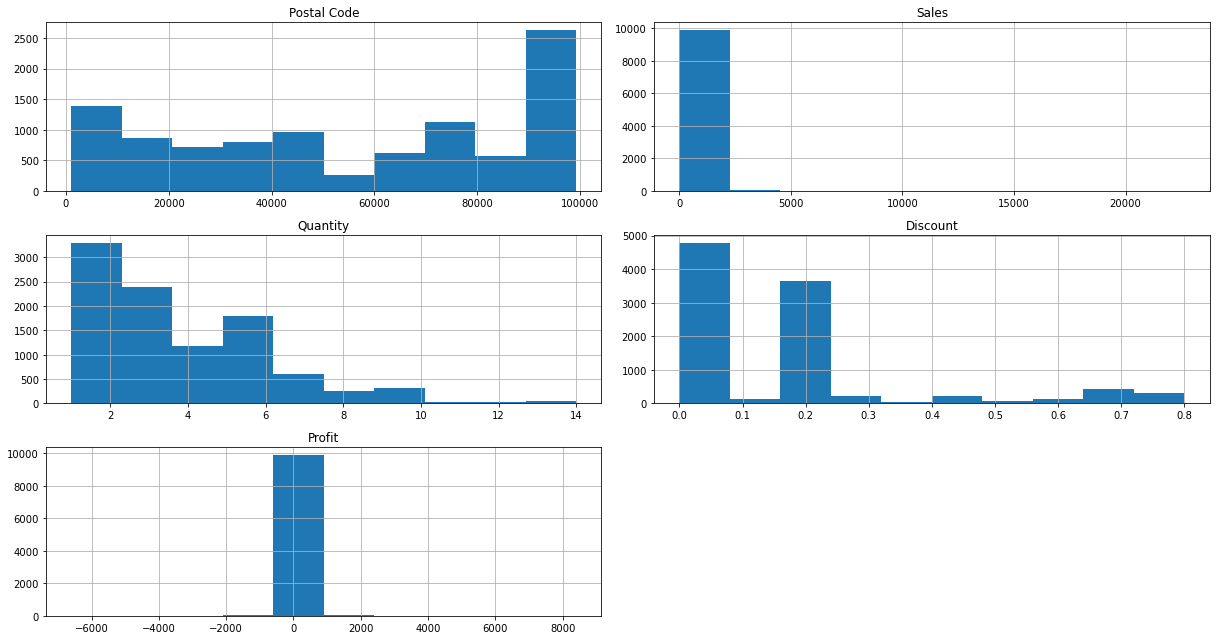

In [21]:
#hist() function considers numeric values only by default
super_data.hist()

#adjusting the subplots
plt.tight_layout()

#to display
plt.show()

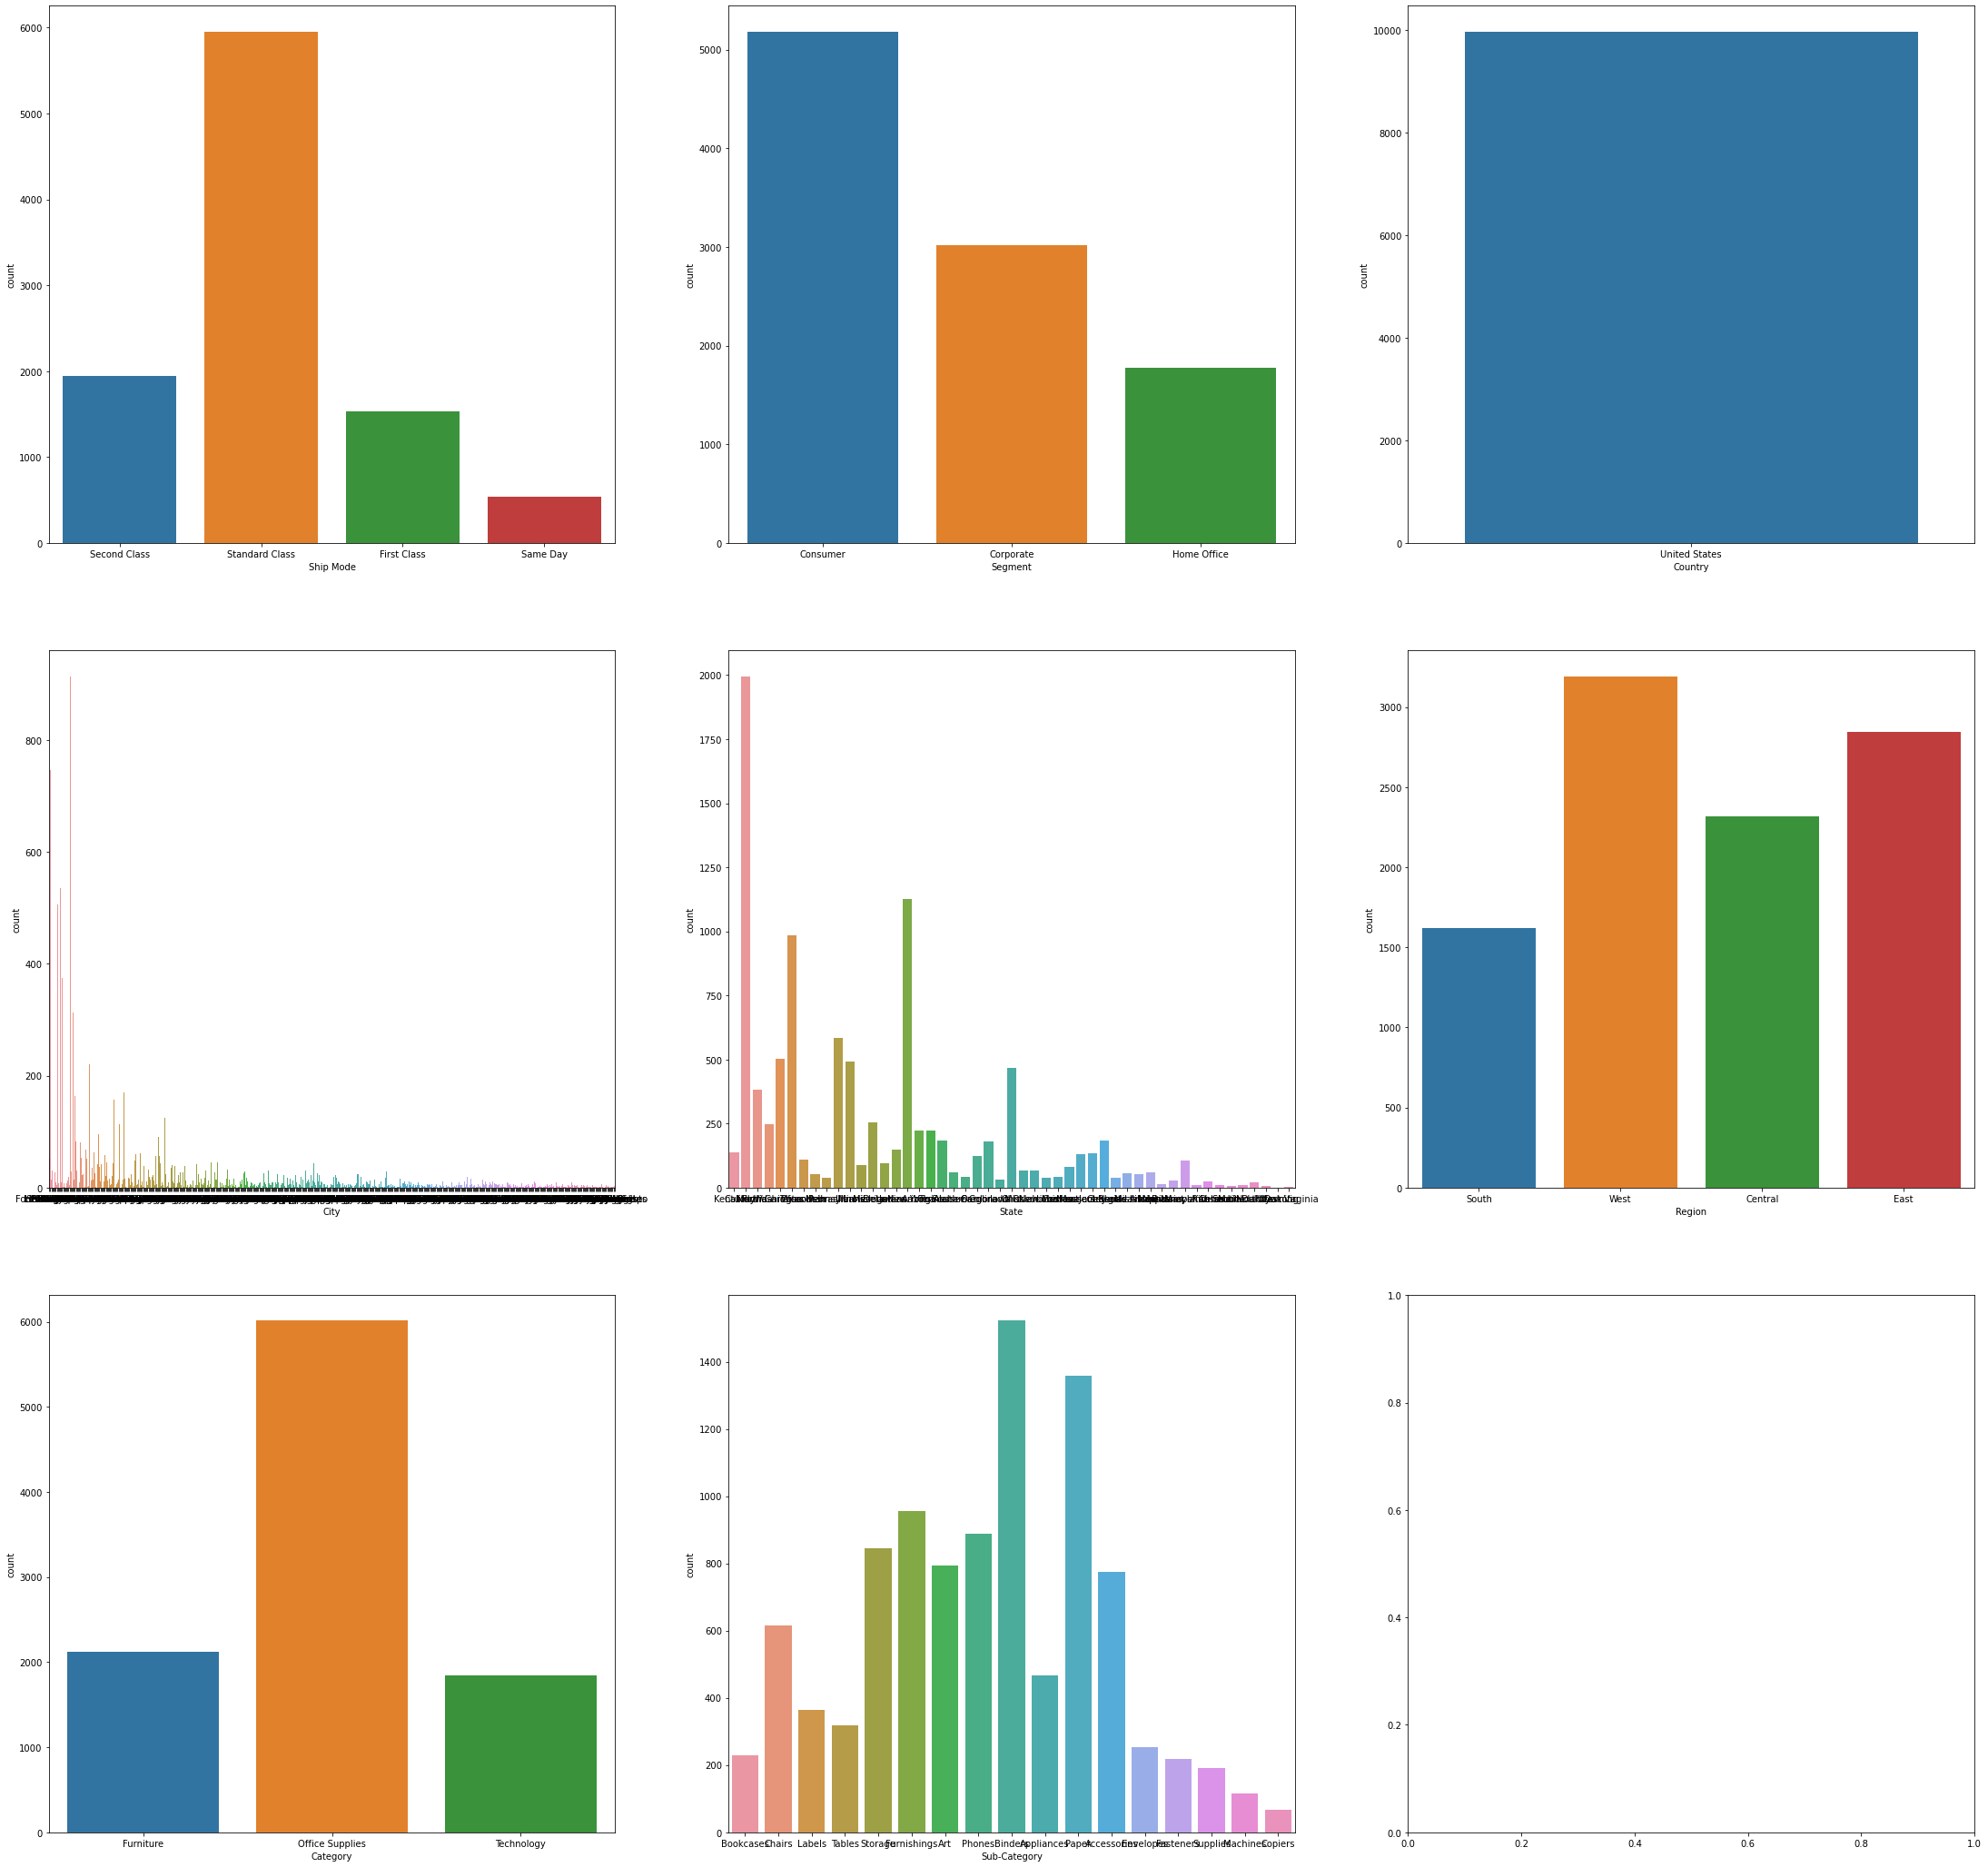

In [22]:
#for the categorical values we use thr barplot to check the distribution of each variable

#we will have to import 'is_string_dtype' from from pandas to check the if input type is string
from pandas.api.types import is_string_dtype

#create a list of all categorical variables
#initiate as an empty list to store the categorical variable
categorical = []

#for loop to check datatype of each cariable

for column in super_data:
    #use if statement with condition to check the categorical type
    if is_string_dtype(super_data[column]):
        #append the variable with categoric datatype in the list "categorical"
        categorical.append(column)
        
#plot the count plot for each categorical variable
#set the number of rows and column in the subplot using the parameter  'nrows' & 'ncols'.
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (38,37))


#use the loop to plot the count plot for each variables
for variable, subplot in zip(categorical, ax.flatten()):
    
    #use countplot() to plot the graph
    #pass the axes foor the plot to the parameter, 'ax'
    sns.countplot(super_data[variable], ax=subplot)
    
#display the plot
plt.show()
        

### Insights:

### 1.Standard Class mode has been Sold majorly, while least being the ones on Same Day.
### 2.We can see in the above plot the few states have high sales based on discount but less profit, we clearly see the region that have highly sales in 'west' and 'east'. 
### 3.Consumer Segment are the ones who buy most.
### 4.Each Category has various count on products, with Office Supplies having the highest and Technology with least.
### 5.Each Sub-Category has various count on products, with Blinders followed by Paper.

In [23]:
# lets visualize the State and Sub-Category individually for much clarification

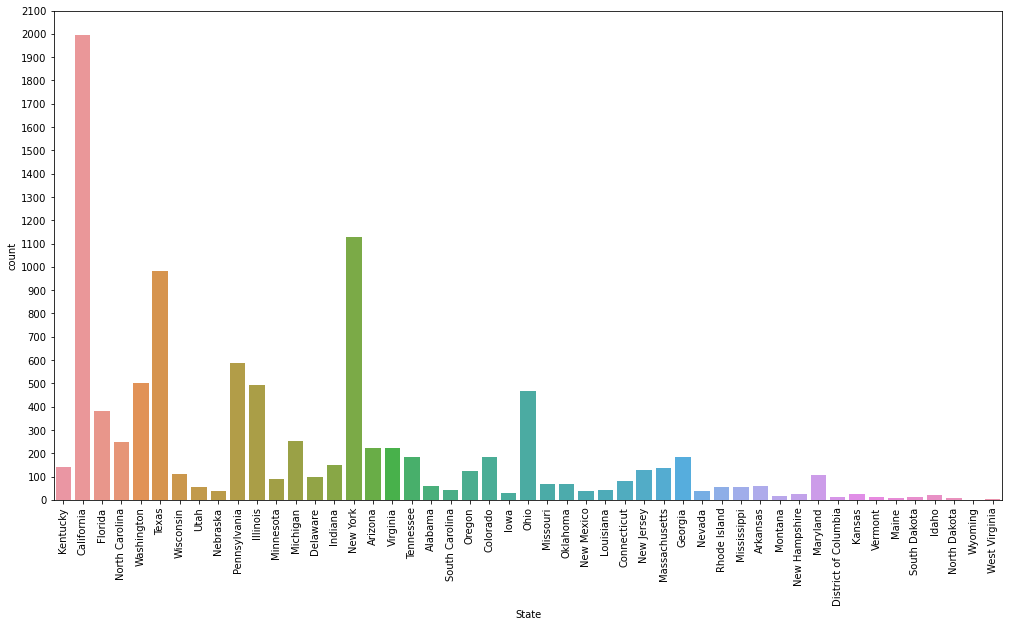

In [24]:
sns.countplot(x='State',data=super_data)
plt.xticks(rotation=90)
plt.yticks(np.arange(0,2200,100))
plt.show()

In [25]:
s_super_data=super_data['State'].value_counts()
s_super_data
# Insight - Each State has various count on products, 
# with California having the highest(1996) and Wyoming with least(1)

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

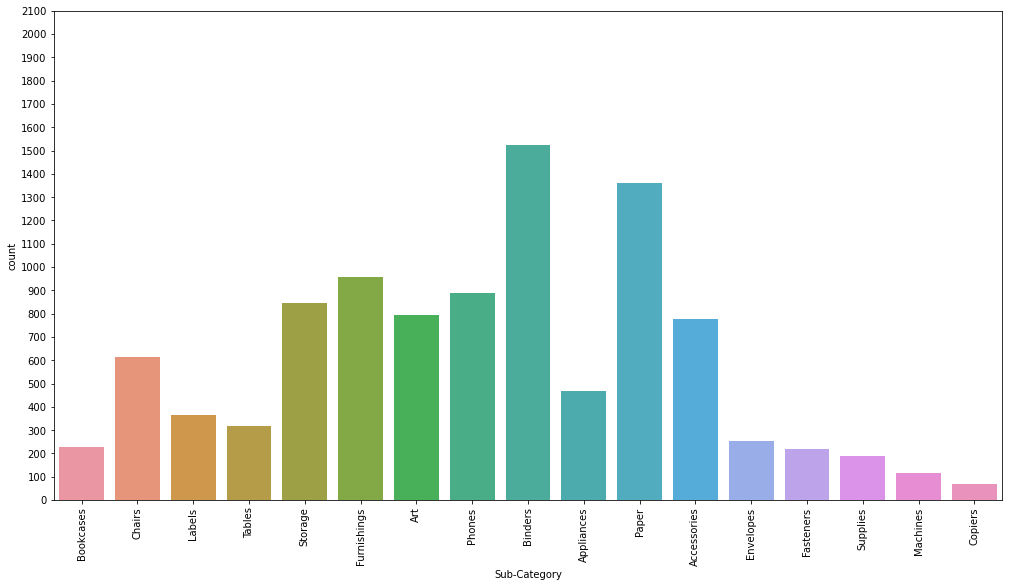

In [26]:
sns.countplot(x='Sub-Category',data=super_data)
plt.xticks(rotation=90)
plt.yticks(np.arange(0,2200,100))
plt.show()
# Insight - Each Sub-Category has various count on products, with Blinders followed by Paper

### Visualize the frequency distribution

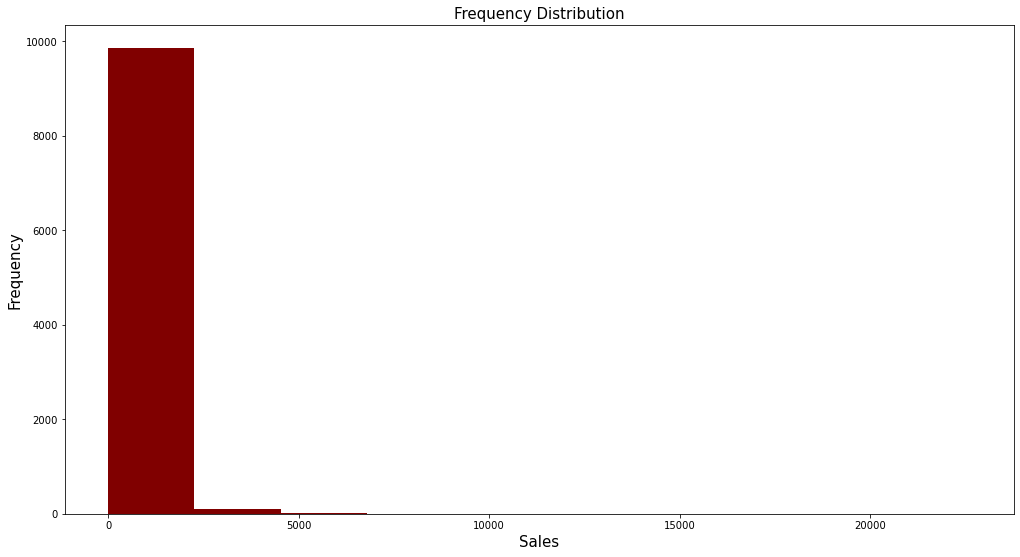

In [27]:
#Set the xlabel and the fontsize
plt.xlabel("Sales",fontsize=15)

#set the ylabel and the fontsize
plt.ylabel("Frequency", fontsize=15)

#set the title of the plot
plt.title("Frequency Distribution", fontsize=15)

#plot the histogra for the target variables
plt.hist(super_data["Sales"],color="maroon")
plt.show()

## Relationship Analysis

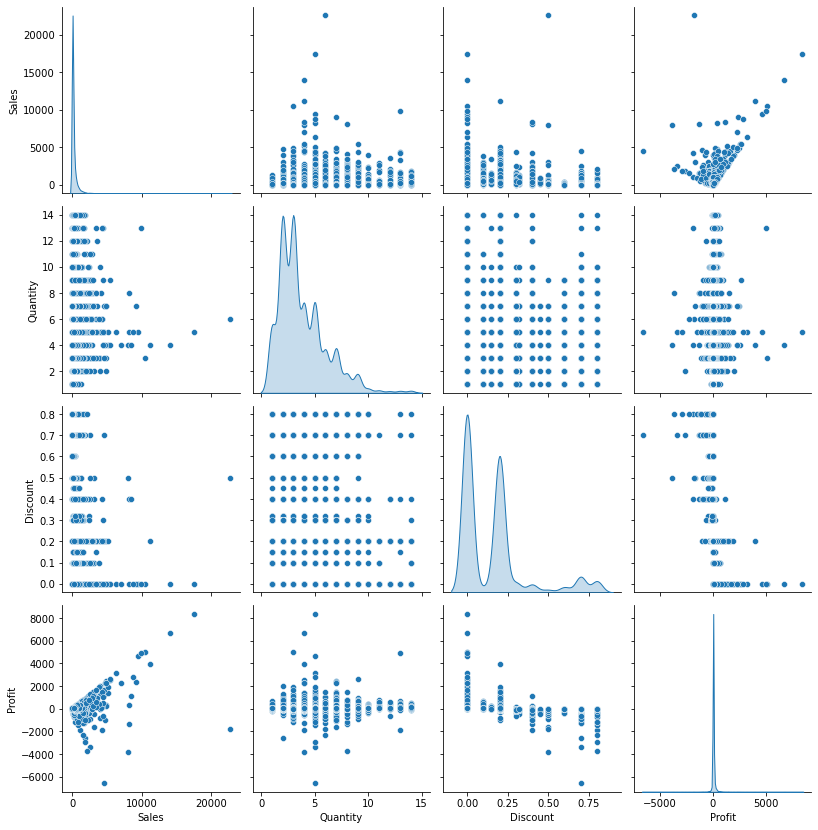

In [28]:
#define the columns that is required for the analysis. We can see that postal code has no role to playt in it.
#now selct the coloum the coloumns for the plot

columns=["Sales","Quantity", "Discount", "Profit"]

##draw the pairplot such that the diagonal should be density plot and graphs should be scatter plot
g = sns.pairplot(data=super_data[columns],size=2,kind="scatter", diag_kind="kde")
g.fig.set_size_inches(12,12)
plt.show()

### lets create a heat map to understand the relationship in a more better way as few relations are not clearly visible in the abole pairplot. The pairplot is not decisive.

<AxesSubplot:>

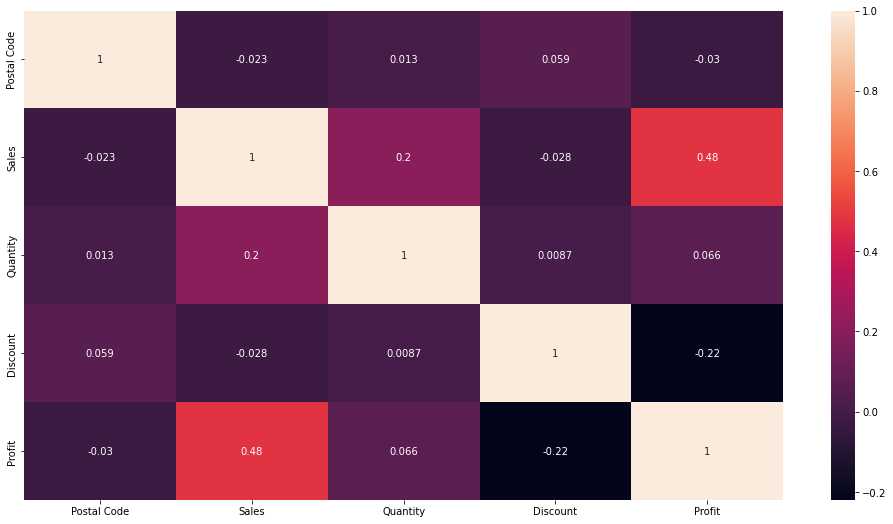

In [29]:
correlation=super_data.corr(method="pearson")
#sns.heatmap(correlation, xticklabels=correlation.super_data[columns],yticklabels=correlation.super_data[columns],annot=True)
sns.heatmap(correlation, data=super_data[columns], annot = True)

## Observation

### 1. Looking at the heatmap , we can see that there is a slight positive relation between Profit and Sales.

###  2. From the map , we can see that there is a negative relation between Discount & Sales.

### 3. There is a negative relation between Discount & Profit as well.


## Checking for outliers 

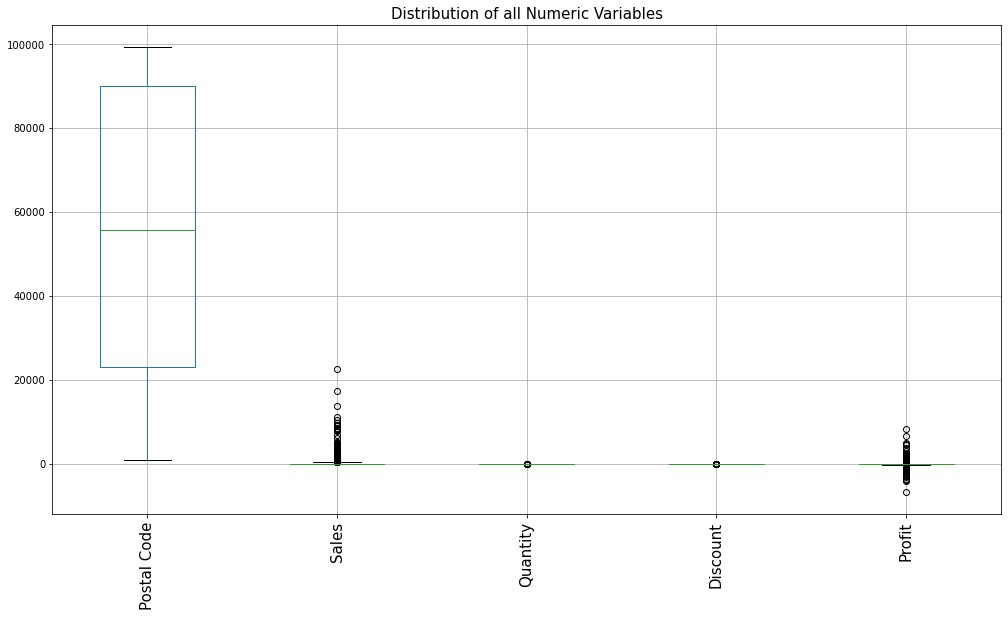

In [30]:
# plot a boxplot to visualize the outliers in all the numeric variables
super_data.boxplot()

# set plot label
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

### from the above plot it seems that 'Sales' & 'Profit' have outliers. Lets visualize them individually to get a clear picture

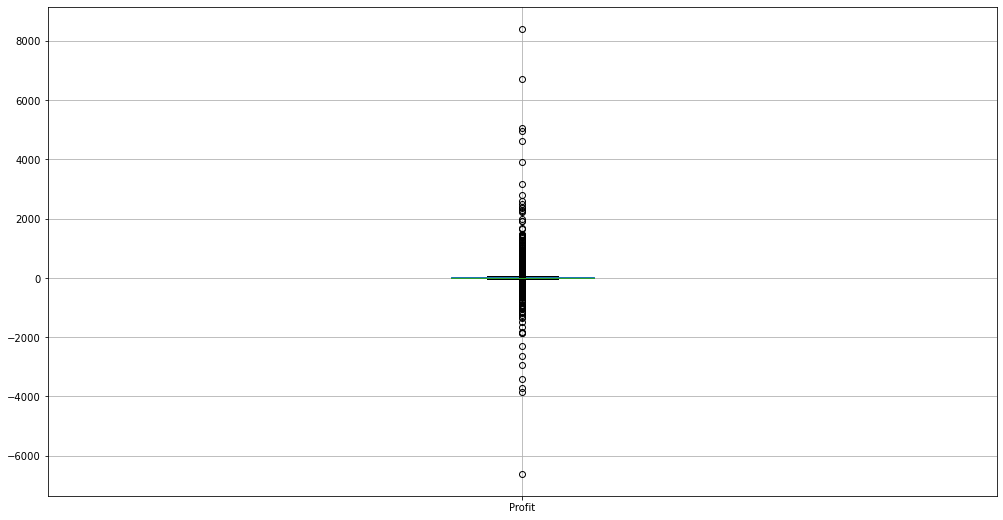

Value of Skewness: 7.554748459862763


In [31]:
super_data.boxplot(column=['Profit'])
plt.show()
print("Value of Skewness:",super_data['Profit'].skew())

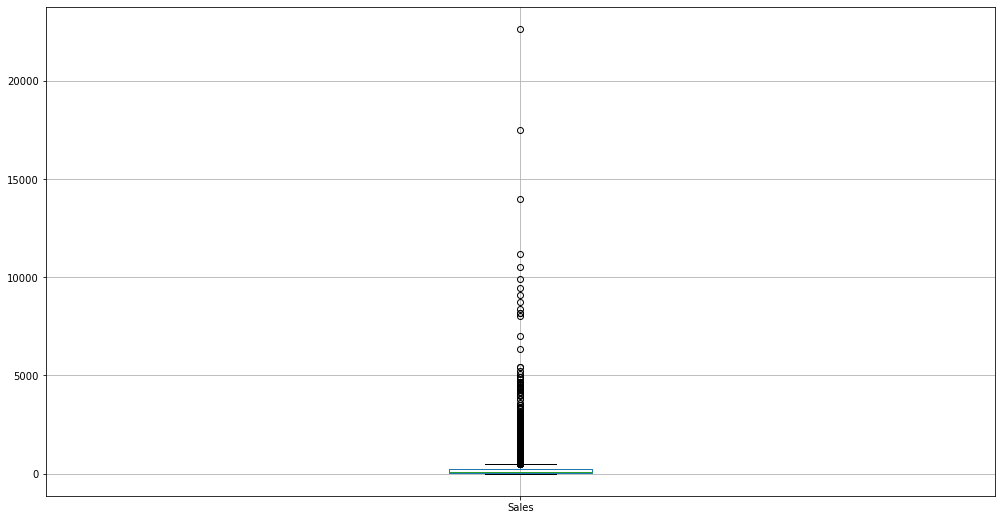

Value of Skewness: 12.963770331688096


In [32]:
super_data.boxplot(column=['Sales'])
plt.show()
print("Value of Skewness:",super_data['Sales'].skew())

## Observation:
 
 ### 1. Usually skewness in between -1 to +1 but here it is 7+ for Profit and around 13 for Sales which shows that the data is highly skewd to the right. 
 
 ### 2. This means there a are outliers and we must remove them because they highly affect prediction.

In [33]:
data_super = super_data[super_data['Sales'] < 10000]

In [34]:
super_data.shape

(9977, 13)

Text(0.5, 1.0, 'Total profit')

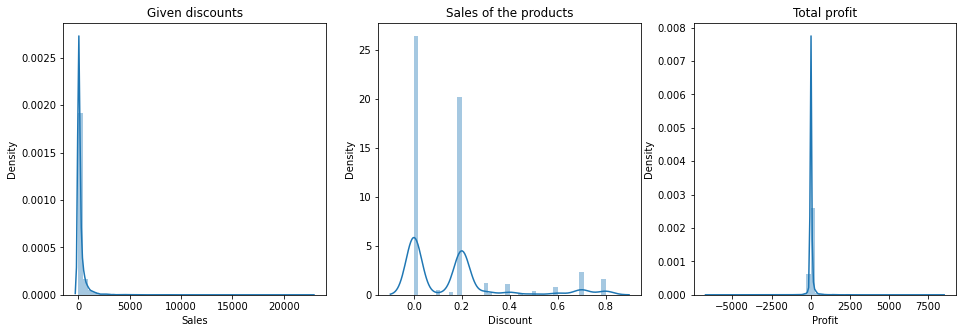

In [39]:
# An advantage of Density Plots over Histograms 
#is that they're better at determining the distribution shape because they're not affected by the number of bins
fig, ax = plt.subplots(1, 3, figsize=(16,5))
sns.distplot(super_data['Sales'],ax=ax[0])
sns.distplot(super_data['Discount'], ax=ax[1])
sns.distplot(super_data['Profit'], ax=ax[2])

ax[1].set_title("Sales of the products")
ax[0].set_title("Given discounts")
ax[2].set_title("Total profit")

In [40]:
# Analysis associated with Profit, Discount and Sales -
# with respect to Ship Mode
sample_super_data =super_data.groupby(['Ship Mode'])[['Sales','Discount','Profit']].mean()
sample_super_data

,Sales,Discount,Profit
Ship Mode,,,
First Class,228.614490,0.164587,31.850134
Same Day,236.755950,0.152675,29.283924
Second Class,236.323750,0.138626,29.565956
Standard Class,227.928858,0.160222,27.534715


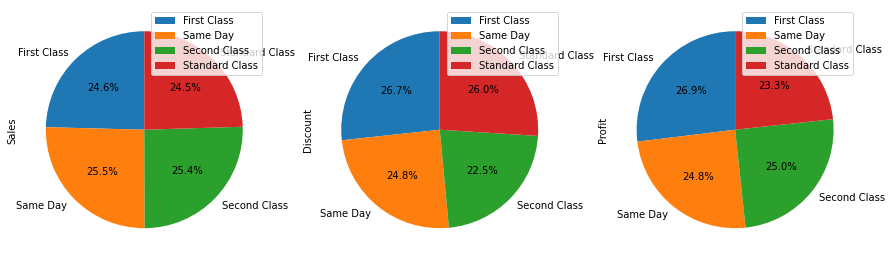

In [41]:
sample_super_data.plot.pie(subplots=True,figsize=(15,20),autopct="%1.1f%%",startangle=90)
plt.show()

## Observations

### 1.Profit and Discount is more in First class & Sales is most in Same day ship mode. 
### 2.Profit and Sales is least in Standard class with least discount in Second class. 

In [42]:
# with respect to segments -
seg_super_data =super_data['Segment'].value_counts().sort_index()
seg_super_data

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

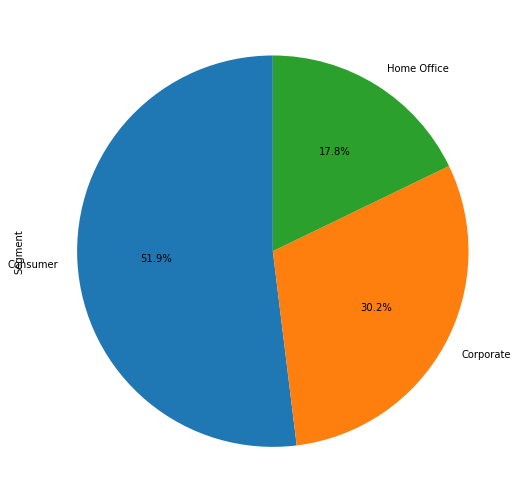

In [43]:
seg_super_data.plot.pie(autopct="%1.1f%%",startangle=90)
plt.show()


## Observation

###  Consumer Segment has the most products being sold

In [44]:
# with respect to segments -
# Analysis associated with Prodit, Discount and Sales -

SampleSuperstore_data_segm=super_data.groupby(['Segment'])[['Sales','Discount','Profit']].mean()
SampleSuperstore_data_segm

,Sales,Discount,Profit
Segment,,,
Consumer,223.969279,0.158308,25.855188
Corporate,234.185781,0.158159,30.499164
Home Office,241.311234,0.147178,33.883643


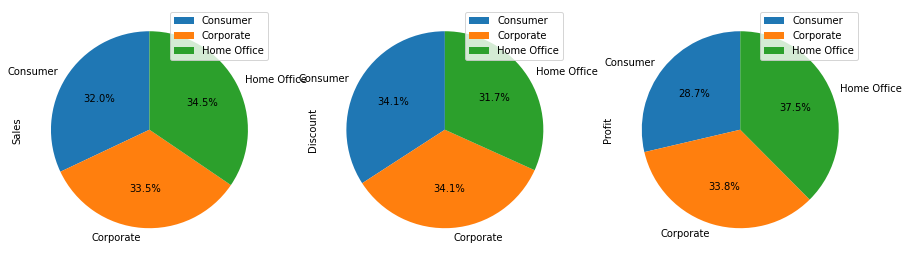

In [45]:
SampleSuperstore_data_segm.plot.pie(subplots=True,figsize=(15,20),autopct="%1.1f%%",startangle=90)
plt.show()

## Observation

### 1. Most sales happened in Home Office
### 2. Most Discount was given in a tie between Consumer and Corporate

In [46]:
# with respect to Region -

region=super_data['Region'].value_counts().sort_index()
region

Central    2319
East       2845
South      1620
West       3193
Name: Region, dtype: int64

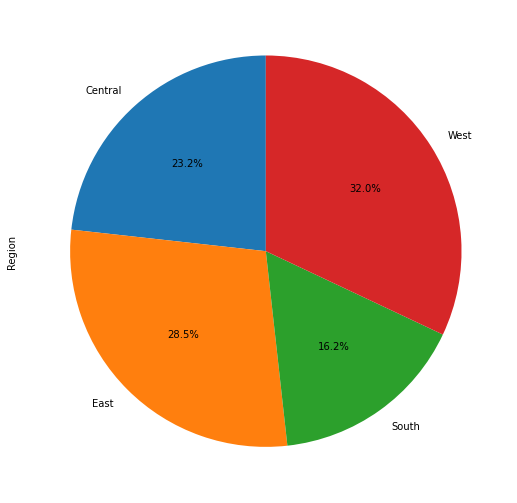

In [47]:
region=super_data['Region'].value_counts().sort_index()
region
region.plot.pie(autopct="%1.1f%%",startangle=90)
plt.show()

## Observation 

### 1. Profit is more in west region and least in central region.
### 2. Discount is provided more in Central region and lease in west region.

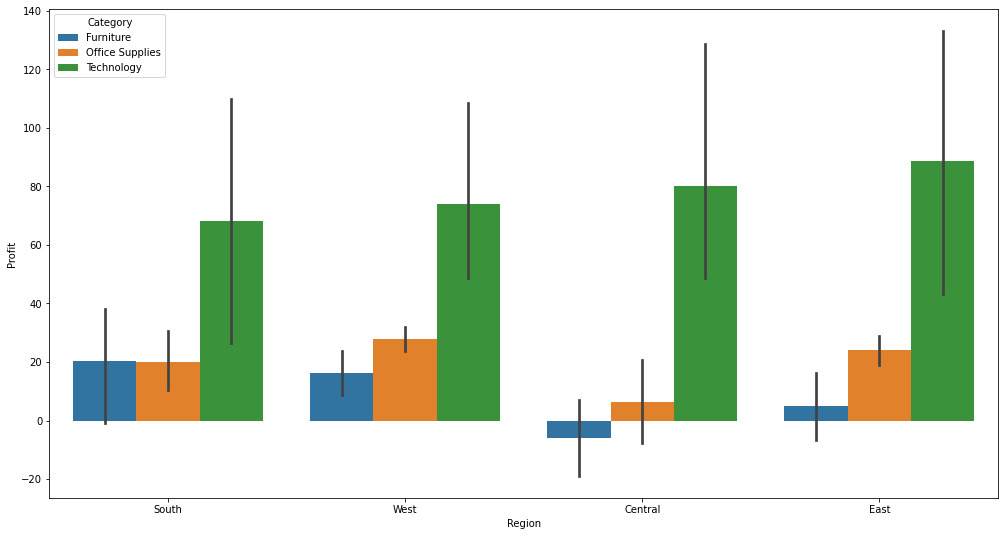

In [50]:
#Analysis with respect to region vs profit, considering for different categories
sns.barplot(data=super_data,x='Region',y='Profit',hue='Category')
plt.show()

#plt.figure(figsize = (12,4))
#sns.barplot(x = "Region",y = "Profit" ,hue = "Category", data=super_data)
#plt.tick_params(labelsize=15)
#plt.show()

## Observation

### From the barplot, 
### 1. we can see that Central region has negative profits for Furnitue Category.
### 2. while highest Profit is for Category Technology in the East Region.

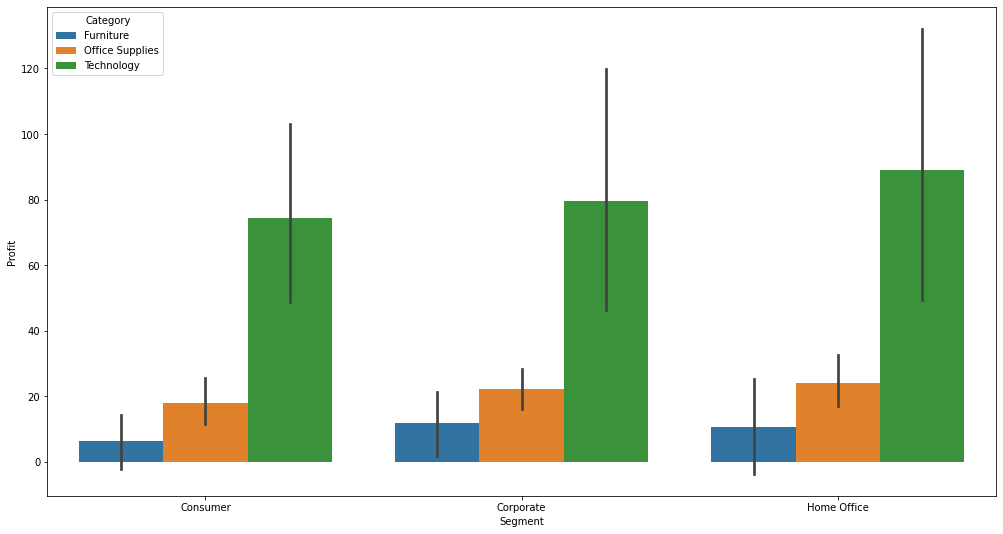

In [51]:
#Analysis with respect to Segment vs profit, considering for different categories

sns.barplot(data=super_data,x='Segment',y='Profit',hue='Category')
plt.show()


## Observations

### From the barplot, 
### 1. we can see that Home Office Segment has max profits for Technology Category.
### 2. while least of all is the Furniture Category Technology in the Consumer Segment.

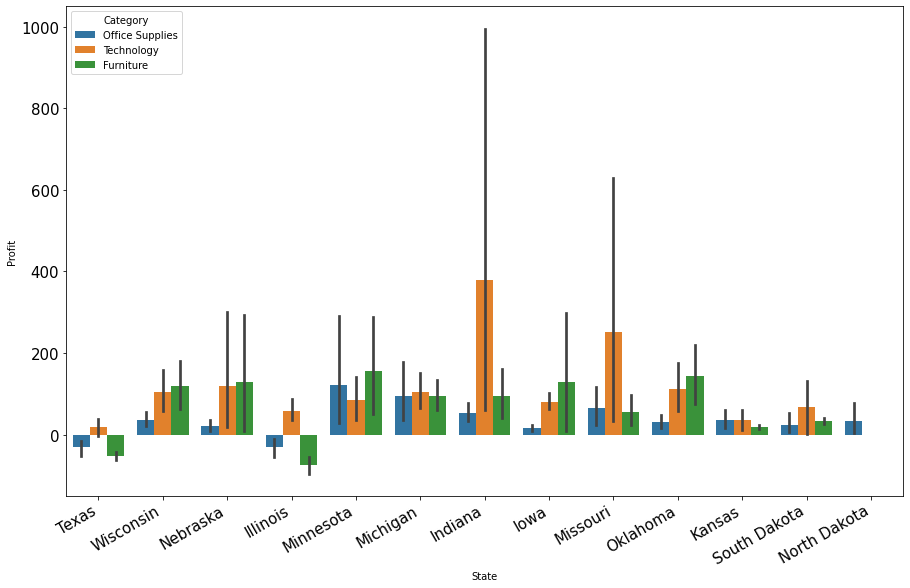

In [52]:
# With respect to State
central_region = super_data[super_data['Region']=='Central']
plt.figure(figsize = (15,10))
sns.barplot(x = "State",y = "Profit" ,hue = "Category", data=central_region)
plt.tick_params(labelsize=15)
plt.gcf().autofmt_xdate()
plt.show()

## Observation

### 1. 'Texas' and 'Illinois' are the only two loss making states in Central Region. They are making losses in 'Furniture' and Office Supplies' category. Let us see the reason behind the losses in these two states.

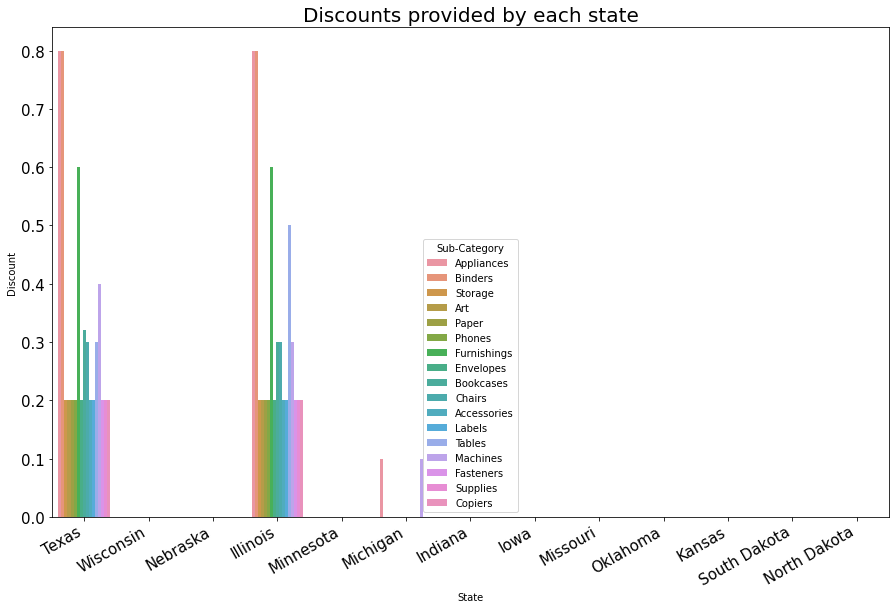

In [53]:
plt.figure(figsize = (15,10))
sns.barplot(x = "State",y = "Discount" ,hue = "Sub-Category", data= central_region)
plt.title("Discounts provided by each state", fontsize = 20)
plt.tick_params(labelsize=15)
plt.gcf().autofmt_xdate()
plt.show()

## Observations

### 1. As we can see 'Texas' and 'Illinois' are the only two states that are providing discounts in the entire Central region.

### 2. Also the Discounts are very high!

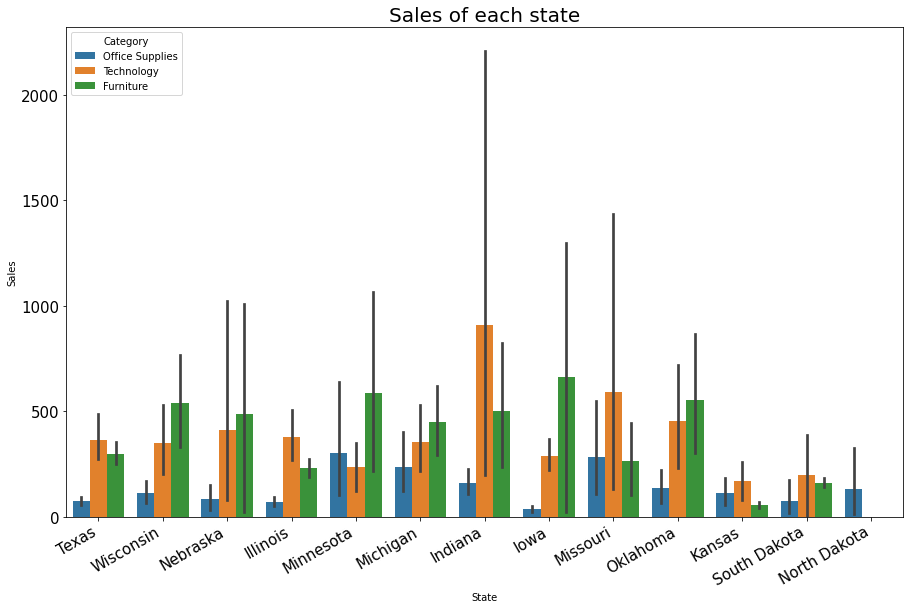

In [54]:
#Are these discounts driving up sales? Lets find out
plt.figure(figsize = (15,10))
sns.barplot(x = "State",y = "Sales" ,hue = "Category", data= central_region)
plt.title("Sales of each state", fontsize = 20)
plt.tick_params(labelsize=15)
plt.gcf().autofmt_xdate()
plt.show()

## Observation

### The answer to the previous question is NO! Although huge discounts are given, the sales of the two states('Texas' and 'Illinois') are relatively very low.

In [55]:
# With respect to State
state=super_data['State'].value_counts()
print("Average Sales in a State",round(state.mean()))

Average Sales in a State 204


In [56]:
data_state=super_data.groupby(['State'])[['Sales','Discount','Profit']].mean()
data_state=data_state.sort_values('Profit',ascending=False)
data_state.head(10)

,Sales,Discount,Profit
State,,,
Vermont,811.760909,0.000000,204.088936
Rhode Island,404.070643,0.021429,130.100523
Indiana,359.431946,0.000000,123.375411
Montana,372.623467,0.066667,122.221900
Minnesota,335.541011,0.000000,121.608847
District of Columbia,286.502000,0.000000,105.958930
Delaware,285.948635,0.006250,103.930988
Wyoming,1603.136000,0.200000,100.196000
Missouri,336.441667,0.000000,97.518341


In [57]:
# With respect to Sub-category
SampleSuperstore_data_subcateg=super_data['Sub-Category'].value_counts().sort_index()
SampleSuperstore_data_subcateg

Accessories     775
Appliances      466
Art             795
Binders        1522
Bookcases       228
Chairs          615
Copiers          68
Envelopes       254
Fasteners       217
Furnishings     956
Labels          363
Machines        115
Paper          1359
Phones          889
Storage         846
Supplies        190
Tables          319
Name: Sub-Category, dtype: int64

In [60]:
ssple_subcateg=super_data.groupby(['Sub-Category'])[['Sales','Discount','Profit']].mean().sort_values(by="Sales")
ssple_subcateg

,Sales,Discount,Profit
Sub-Category,,,
Fasteners,13.936774,0.082028,4.375660
Art,34.096896,0.074969,8.207059
Labels,34.283504,0.068871,15.224193
Paper,57.560075,0.074908,24.977365
Envelopes,64.867724,0.080315,27.418019
Furnishings,95.902745,0.138494,13.653476
Binders,133.645972,0.372011,19.860710
Accessories,215.974604,0.078452,54.111788
Appliances,230.755710,0.166524,38.922758


In [61]:
# With respect to Quantity
quant=super_data['Quantity'].value_counts().sort_values(ascending=False)
quant

3     2400
2     2399
5     1230
4     1186
1      899
7      606
6      572
9      258
8      257
10      57
11      34
14      29
13      27
12      23
Name: Quantity, dtype: int64

In [62]:
data_quant=super_data.groupby(['Quantity'])[['Sales','Discount','Profit']].mean()
data_quant

,Sales,Discount,Profit
Quantity,,,
1,59.234632,0.152959,8.276396
2,120.377982,0.154844,16.027769
3,175.630896,0.153321,23.720306
4,272.779827,0.158373,37.227971
5,337.936339,0.157146,40.257394
6,362.101960,0.166556,18.051517
7,395.888393,0.161980,56.579163
8,458.210802,0.171595,42.244342
9,498.083683,0.147946,68.557716


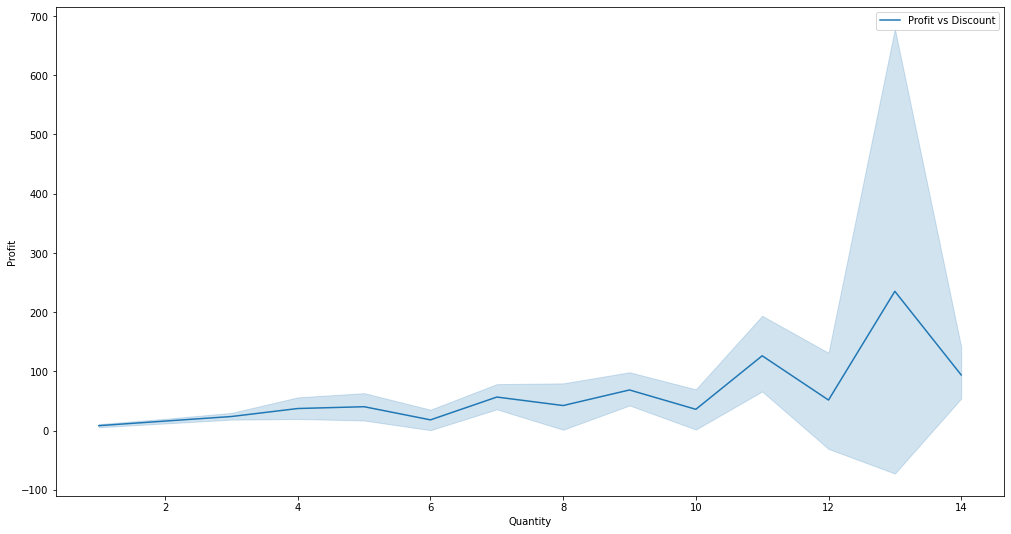

In [63]:
sns.lineplot(x='Quantity',y='Profit',data=super_data,label="Profit vs Discount")
plt.show()

## Observation

### 1. # Profit increase with quantity

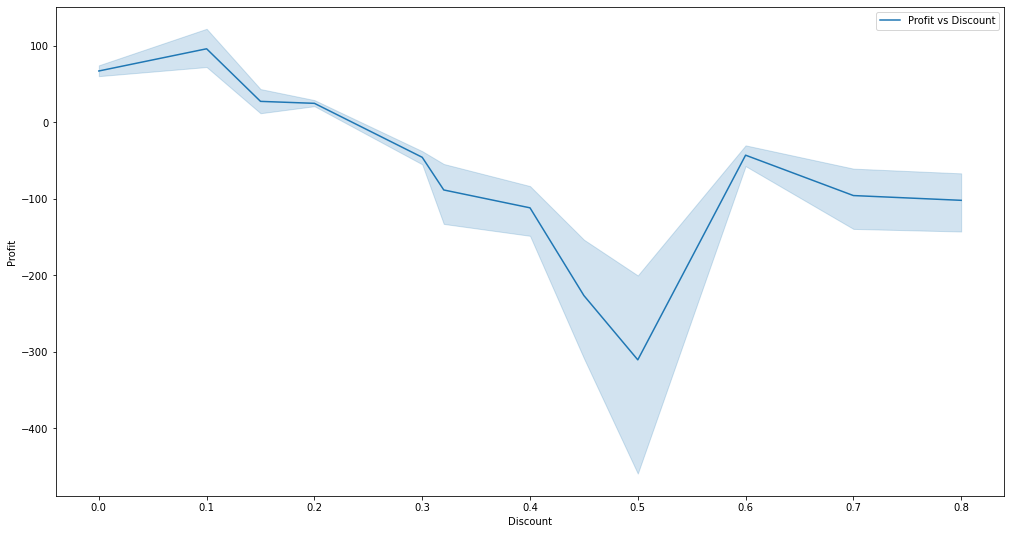

In [64]:
sns.lineplot(x='Discount',y='Profit',data=super_data,label="Profit vs Discount")
plt.show()

## Observation


### 1.  Profit decreases with discount

# Conclusion

## 1. Data contains 9994 records with 13 features. After cleaning it contains 9977 records and 13 features.
## 2. Data set is about country USA.
## 3. There were no null values present but 17 duplicate records were present.
## 4. Outliers were present in the dataset.
## 5. Profit and Discount have negative correlation as well as Profit and Sales have negative correlation.
## 6. State with highest Sales and Profit is Vermont and gives 0 discount, maybe look for a midway to get more customers + discounts.
## 7. Quantity is the factor that tells as quantity increases, it becomes directly proportional to Profit, with max quantity as 13 sold, with max sales and profit Maybe indivualise and maximise profits for comparitively larger quantity of products which are been bought. 9.Profit decreases with discount, i.e. they are inversely proportional. Try to set the values to maximise Profits. 10.Copiers subcategory has max sales.
## 8. Consumer Segment has the most products being sold 12.Technology Category has max profits.
## 9. Furniture Category is in loss as profit is lowest although its sales is high.
## 10. entral region is the only region with negative profit in ‘Furniture’ and ‘Office Supplies’ category. This is due to high discount given by the Texas and Illinois state having very low sales rate.
## 11. ‘Technology’ category has more profit than ‘Furniture’ and ‘Office Supplies’. Whereas, Office Supplies has lowest sales and profit, so we need to focus on this category more.